## Chapter 9
### This notebook and the figures below are made by Yeseul Lee, under the guidance of Steven Skiena.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math, random
import pandas as pd

from scipy.spatial import ConvexHull
from scipy import stats
from sklearn.metrics import mean_squared_error
from matplotlib import cm
from sklearn.linear_model import LogisticRegression
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

### Figure 9.1  - Linear Regression graph

[3.16727929 0.14053509]


(-4, 4.6)

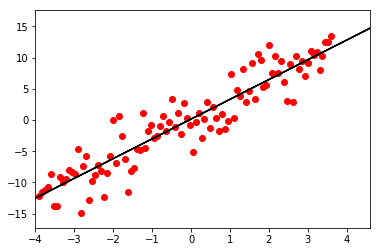

In [2]:
# Create a random noise
x1 = np.random.normal(size=200)
xs = np.linspace(x1.min()-1, x1.max()+1, 100)
x = xs
y = 3*(np.random.normal(0, 1, 100)+x)
plt.scatter(x, y , color='red')

#Find the regression line
regression = np.polyfit(x,y,1)
print(regression) 
longerX = np.append(x, [5,-5])
plt.plot(longerX, regression[0]*longerX + regression[1], color='black', linewidth='1.5')
plt.xlim(-4, 4.6)

### Figure 9.2  - Point and line duality
#### p = (a,b) -> p* = ax - b

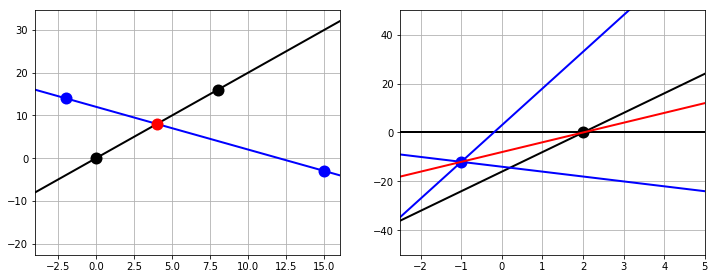

In [3]:
plt.figure(figsize=(12,4.5))

plt.subplot(121)
x = np.linspace(-10,16,500)
y = 2*x
y2 = -x+12
plt.plot(x, y, 'k-', x, y2, 'b-', linewidth=2)
plt.plot([0], [0], 'ko', [8],[16], 'ko', [-2], [14], 'bo', [15], [-3], 'bo', [4], [8], 'ro', markersize=12, markeredgewidth=0)
plt.xlim(-4,16)
plt.grid()

plt.subplot(122)
plt.plot(x, 0*x, 'k-', linewidth=2)
plt.plot(x, 8*x-16, 'k-', linewidth=2)
plt.plot([2], [0], 'ko', [-1], [-12], 'bo', markersize=12, markeredgewidth=0)
plt.plot(x, -2*x-14, 'b-', x, 15*x+3, 'b-', x, 4*x-8, 'r-', linewidth=2)
plt.xlim(-2.5,5)
plt.ylim(-50,50)
plt.grid()

### Figure 9.3  - Residual error

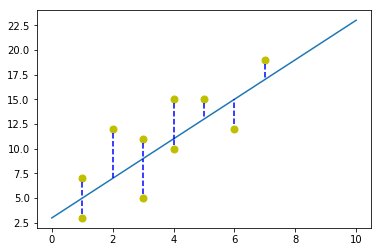

In [4]:
x = np.linspace(0, 10, 100)
y = 2*x+3
#distance the dashed line is into the circle
s = 0.4

plt.plot(x, y)
plt.plot([1, 1, 2, 3, 3, 4, 4, 5, 6, 7],[7, 3, 12, 5, 11, 15, 10, 15, 12, 19], 'yo', markersize=7)
plt.plot([1, 1], [7-s, 5], 'b-', [1, 1], [3+s, 5], 'b-', \
         [2, 2], [12-s, 7], 'b-', [3, 3], [5+s, 9], 'b-', \
         [3, 3], [11-s, 9], 'b-', [4,4], [15-s, 11], 'b-', \
         [4,4], [10+s, 11], 'b-', [5, 5], [15-s, 13], 'b-',\
         [6, 6], [12+s+0.1, 15], 'b-', [7, 7], [19-s, 17], 'b-', linestyle='dashed')

### Figure 9.4 Regression line and outlier

r2 = 0.9165415868902137
r1 = 0.5482827260234993


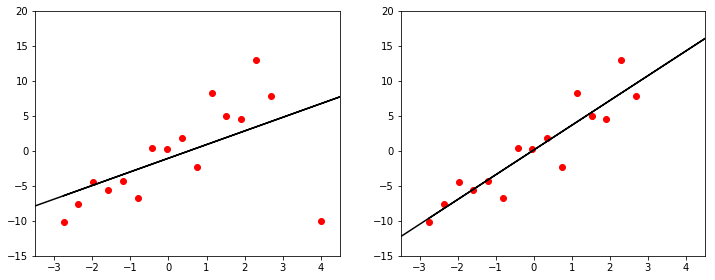

In [5]:
plt.figure(figsize=(12,4.5))

#The right graph without an outlier.
plt.subplot(122)
# Create a random 15 points
np.random.seed(7)
x1 = np.random.normal(size=10)
x = np.linspace(x1.min()-1, x1.max()+1, 15) 
y = 3*(np.random.normal(0, 1, 15)+x)
plt.scatter(x, y , color='red')

#Find the regression line
regression = np.polyfit(x,y,1)
longerX = np.append(x, [5,-5]) #this makes the regression line longer
plt.plot(longerX, regression[0]*longerX + regression[1], color='black', linewidth='1.5')
plt.xlim(-3.5,4.5)
plt.ylim(-15, 20)
#The correlation coefficient value r.
r1 = stats.pearsonr(x, y)
print('r2 =', r1[0]) 

#The left graph with an outlier
plt.subplot(121)
#plot the 15 points with an outlier.
x1 = np.append(x, [4])
y1 = np.append(y, [-10])
plt.scatter(x1, y1 , color='red')

#Find the regression line
regression = np.polyfit(x1,y1,1)
longerX = np.append(x1, [5,-5]) #this makes the regression line longer
plt.plot(longerX, regression[0]*longerX + regression[1], color='black', linewidth='1.5')
plt.xlim(-3.5,4.5)
plt.ylim(-15, 20)
#The correlation coefficient value r.
r2 = stats.pearsonr(x1, y1)
print('r1 =', r2[0])

### Figure 9.5

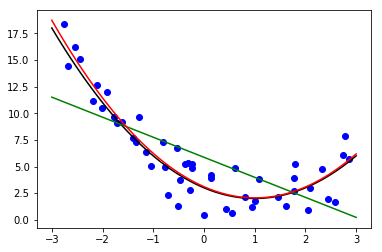

In [6]:
#Plot a quadratic function x^2 - 2*x + 3
x1 = np.linspace(-3,3,100)
y1 = x1*x1 - 2*x1 + 3
plt.plot(x1, y1, 'k-', linewidth=1.5)

# Create random points
np.random.seed(7)
x = []
y=[]
for i in range(0,50):
    a = np.random.uniform(-3, 3)
    b = a*a - 2*a + 3
    c = np.random.uniform(-3,3)
    x.append(a)
    y.append(b+c)

plt.scatter(x, y , color='blue')

#Find the regression line mx + c and curve a*x*x + b*x + c
regline = np.polyfit(x,y,1)
plt.plot(x1, regline[0]*x1 + regline[1], 'g-', linewidth=1.5)
regcurve = np.polyfit(x,y,2)
plt.plot(x1, regcurve[0]*x1*x1 + regcurve[1]*x1 + regcurve[2], 'r-', linewidth=1.5)

### Figure 9.6 Left

Summary of Fig 9.6
1. Get the points (plot y = x line and make random points around the line by adding noise to the points.)
2. Find the zscore of the points. (x-xmean/xstd, y-ymean/ystd)
3. for angle 0 to 90, find the mean squared error of the line to the points.
4. plot (angle, error)

Text(0, 0.5, 'y')

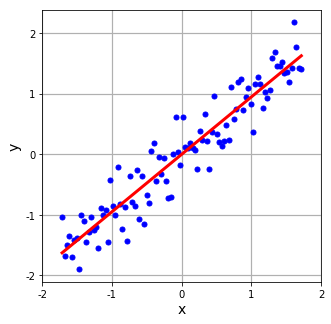

In [7]:
## Make Points

np.random.seed(7)
x = np.linspace(0,10, 100)
y = np.random.normal(0,1, 100)+x

xmean = np.mean(x)
xstd = np.std(x)
ymean = np.mean(y)
ystd = np.std(y)

## Compute the zscores
xz = []
yz = []
for i, j in zip(x, y):
    xz.append((i-xmean)/float(xstd))
    yz.append((j-ymean)/float(ystd))
    
plt.figure(figsize=(5,5))

plt.plot(xz, yz, 'bo', markersize=5)
regline = np.polyfit(xz, yz, 1)
plt.plot(xz, [k*regline[0] for k in xz], 'r-', linewidth=3)

plt.grid(linewidth=1.2)
plt.xticks([-2,-1,0,1,2], ['-2','-1','0','1', '2'])
plt.yticks([-2,-1,0,1,2], ['-2','-1','0','1', '2'])
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)

### Figure 9.6 Right

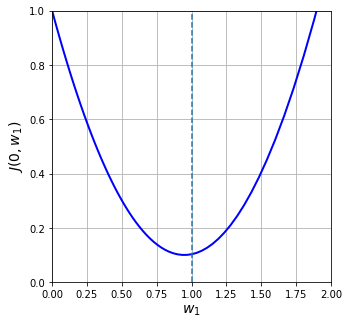

In [8]:
errorlst = []
label = []
#for angle 0 ~ 89 bc when a = 90, it is a vertical line.
for a in range(0,90, 1):
    # slope = y/x
    slope = math.sin(math.radians(a))/float(math.cos(math.radians(a)))
    label.append(slope)
    error = mean_squared_error(yz, [ slope*k for k in xz])
    errorlst.append(error)

#Slope vs. errorlst
plt.figure(figsize=(5,5))
plt.plot(label, errorlst, 'b-', linewidth=2)
plt.plot([1,1],[0,1], '--')
plt.xlim(0,2)
plt.ylim(0,1)
plt.xlabel(r"$w_1$", fontsize=14)
plt.ylabel(r"$J(0,w_1)$", fontsize=14)
plt.grid()

### Figure 9.7
#### Made with the help of this tutorial: http://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html

Text(0.5, 0, '$J(w_0, w_1)$')

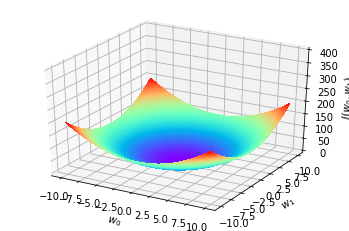

In [9]:
X = np.arange(-10, 10, 0.1)
Y = np.arange(-10, 10, 0.1)
X, Y = np.meshgrid(X, Y)
R = 1*((X**2)/(1) + (Y**2)/1)
Z = R

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.rainbow,
                       linewidth=0, antialiased=False)
ax.set_zlim(0,400)
ax.set_zticks(np.arange(0,450,50))
ax.set_xlabel(r"$w_0$")
ax.set_ylabel(r"$w_1$")
ax.set_zlabel(r"$J(w_0, w_1)$")

### Figure 9.8
The tangent line approximates the derivative.

[]

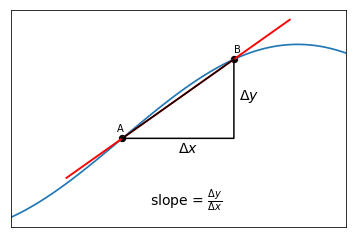

In [10]:
x = np.linspace(-1,2,100)
y = 0.7*np.sin(x)
plt.plot(x,y, linewidth='1.7')

#the tangent line
x0 = 0.0
x1 = 1.0
slope=(0.7*np.sin(x1)-0.7*np.sin(x0))/(x1-x0)
xline = np.linspace(x0-0.5, x1+0.5, 100)
plt.plot(xline, slope*xline, 'r-', linewidth='1.9')

#the points
plt.scatter([x0,x1],[0.7*np.sin(x0), 0.7*np.sin(x1)], s=40, color='black')
plt.text(x0-0.05, 0.7*np.sin(x0)+0.05, 'A')
plt.text(x1, 0.7*np.sin(x1)+0.05, 'B')

#the triangle
plt.plot([x0,x1,x1,x0], [0.7*np.sin(x0), 0.7*np.sin(x1),0.7*np.sin(x0), 0.7*np.sin(x0)], color='black')
plt.text(x0+0.5, 0.7*np.sin(x0)-0.1, r'$\Delta x$', fontsize=14)
plt.text(x1+0.05, 0.7*np.sin(x1)-0.3, r'$\Delta y$', fontsize=14)
plt.text(x0+0.25, 0.7*np.sin(x0)-0.5, r'slope = $\frac{\Delta y}{\Delta x}$', fontsize=14)

plt.xlim(-1,2)

#Hide the x and y axis.
plt.gca().axes.get_xaxis().set_ticks([])
plt.gca().axes.get_yaxis().set_ticks([])

### Figure 9.11 - Bumpy surface

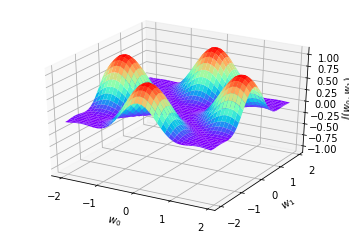

In [11]:
X = np.arange(-2, 2, 0.1)
Y = np.arange(-2, 2, 0.1)
X, Y = np.meshgrid(X, Y)
R = np.sin(X) + np.cos(Y)
R = ((np.cos(X))**4+(np.cos(Y))**4-2*((np.cos(X))**2)*((np.cos(Y))**2))
Z = R
#Equation from http://stackoverflow.com/questions/24045379/matplotlib-3d-surface-of-bumpy-function-does-not-work

fig = plt.figure()
ax = fig.gca(projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.rainbow, linewidth=0)
ax.set_zlim(-1.1,1.1)
ax.set_xlabel(r"$w_0$")
ax.set_ylabel(r"$w_1$")
ax.set_zlabel(r"$J(w_0, w_1)$")
ax.set_xticks(np.arange(-2,2.1,1))
ax.set_yticks(np.arange(-2,2.1,1))

### Figure 9.12

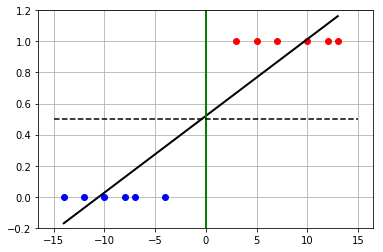

In [12]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

x = [-14,-12, -10, -8, -7, -4]
x1 = [ 3, 5, 7, 10, 12, 13]
y = [0]*len(x)
y1 = [1]*len(x1)
regline = np.polyfit(x+x1,y+y1,1)

plt.plot(x,y, 'bo', x1,y1,'ro')
plt.plot(x+x1, [regline[0]*i + regline[1] for i in x+x1], 'k-', linewidth=2)
plt.plot([0,0],[1.2,-0.2], 'g-', linewidth=2)
plt.plot([-15,15],[0.5,0.5], 'k--')

plt.ylim(-0.2, 1.2)
plt.grid()

### Figure 9.15 - The logit function 

Text(2, 0.7, '$\\frac{1}{1+e^{-x}}$')

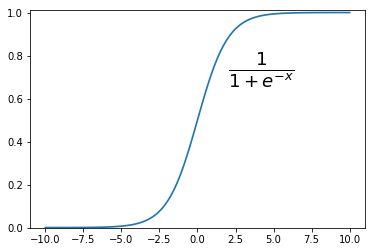

In [13]:
c = 1
x = np.linspace(-10,10,100)
y = 1/(1+np.exp(-c*x))

plt.plot(x,y, linewidth='1.7')
plt.ylim(-0.001,1.01)
plt.text(2, 0.7, r'$\frac{1}{1+e^{-x}}$', fontsize=26, fontweight='bold')

### Figure 9.16

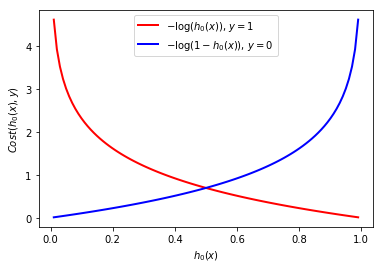

In [14]:
x = np.linspace(0.01,0.99, 100)
y1 = -np.log(x)
y2 = -np.log(1-x)

plt.plot(x, y1, 'r-', label=r"$-\log(h_0(x))$, $y=1$", linewidth=2)
plt.plot(x, y2, 'b-', label=r"$-\log(1-h_0(x))$, $y=0$", linewidth=2)

plt.xlabel(r'$h_0(x)$')
plt.ylabel(r"$Cost(h_0(x), y)$")
plt.legend(loc="upper center")

### Figure 9.17
#### The source of the data set https://www.statcrunch.com/app/index.php?dataid=1406047
You can look at figure 10.11, which is another version of this figure but using K-means.

[80.83958333333334, 167.02430555555554]
0.4792877171682132


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Text(0.5, 1.0, 'Logistic Regression')

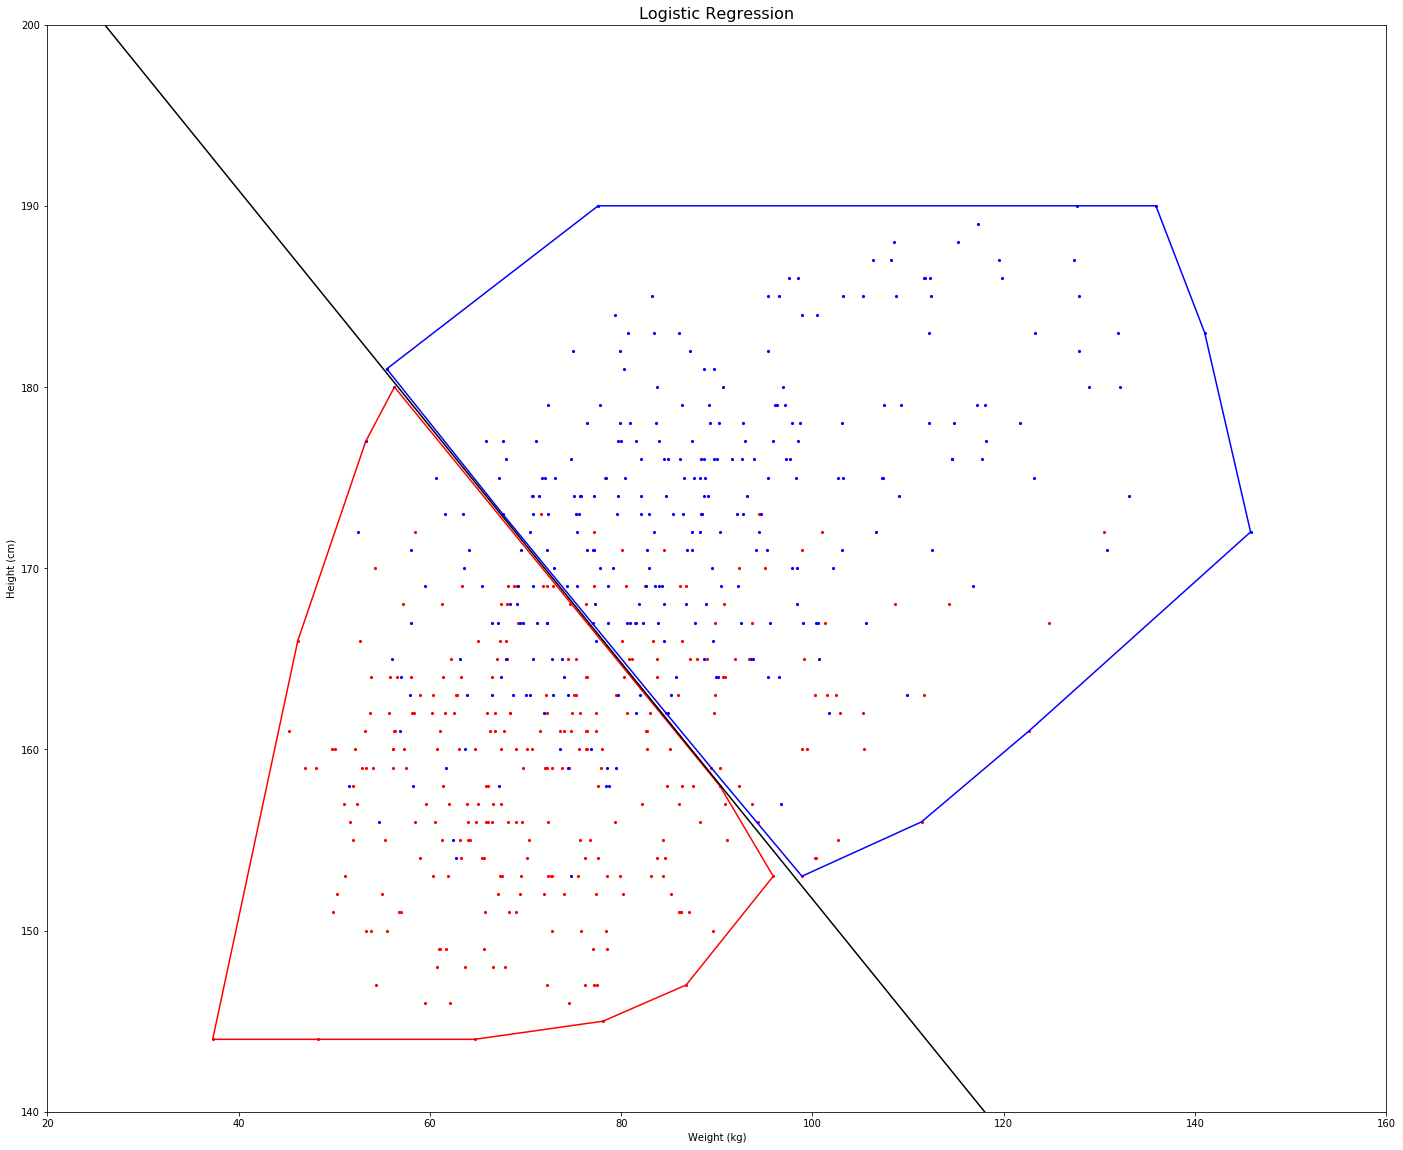

In [21]:
path = "weight.csv"
csv_data = pd.read_csv(path)
female = csv_data[(csv_data['Gender'] == 0) & (csv_data['Age'] >=800) & (csv_data['Age'] <=900)] #Age is by the number of months. 20~40
male = csv_data[(csv_data['Gender'] == 1) & (csv_data['Age'] >=800) & (csv_data['Age'] <= 900)]
y = np.append(female["Height"], male["Height"])
x = np.append(female["Weight"], male["Weight"])
z = [[i,j] for i,j in zip(x,y)]

plt.figure(figsize=(24,20))

#Log Reg
f = [0]*len(female)
m = [1]*len(male)
k = np.append(f,m)
reg = LogisticRegression()
reg.fit(z,k)
label = reg.predict(z)

#Draw the convex hull.
division1 = [i for i,c in zip(z, label) if c == 1]
division1= np.array(division1)
division2 = [i for i,c in zip(z, label) if c == 0]
division2 = np.array(division2)
hull1 = ConvexHull(division1)
hull2 = ConvexHull(division2)

# to make the line come back to the first point, I appended the first vertice to it at last.
plt.plot(np.append(division1[hull1.vertices, 0], division1[hull1.vertices[0],0]), \
         np.append(division1[hull1.vertices,1], division1[hull1.vertices[0],1]),'b-', linewidth=1.5)
plt.plot(np.append(division2[hull2.vertices, 0], division2[hull2.vertices[0],0]), \
         np.append(division2[hull2.vertices,1], division2[hull2.vertices[0],1]),'r-', linewidth=1.5)
plt.scatter(female['Weight'], female['Height'], c='red', s=10, lw=0)
plt.scatter(male['Weight'], male['Height'], c='blue', s=10, lw=0)

#Find the perpendicular bisector
#first find the centroids
cx1 = np.sum(division1[:,0])/len(division1)
cy1 = np.sum(division1[:,1])/len(division1)
cx2 = np.sum(division2[:,0])/len(division1)
cy2 = np.sum(division2[:,1])/len(division1)

midpoint = [(cx1+cx2)/2.0, (cy1+cy2)/2.0]
print (midpoint)
lineslope = (cy2-cy1)/(cx2-cx1)
print (lineslope)
perslope = -1/lineslope
perx = [20,120]
pery = perslope*(perx - midpoint[0]) + midpoint[1]

#Line separating the two
plt.plot([26,118], [200,140], 'k-')

plt.xlim(20,160)
plt.ylim(140,200)
plt.xlabel("Weight (kg)")
plt.ylabel("Height (cm)")
plt.title("Logistic Regression", fontsize=16)